In [1]:
import numpy as np
import pandas as pd
import spacy
nlp = spacy.load("fr_core_news_lg")
from sklearn.decomposition import PCA
import seaborn as sns
from sentence_transformers import SentenceTransformer
st = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")
from utils import read_text_file, cosine_distance, get_pairwise_metric_matrix

C:\Users\antoi\Anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'fr_core_news_lg' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
miserables = read_text_file("discours/miserables.txt")
miserables

'En 1815, M. Charles-François-Bienvenu Myriel était évêque de Digne. C’était un vieillard d’environ soixante-quinze ans ; il occupait le siége de Digne depuis 1806. Quoique ce détail ne touche en aucune manière au fond même de ce que nous avons à raconter, il n’est peut-être pas inutile, ne fût-ce que pour être exact en tout, d’indiquer ici les bruits et les propos qui avaient couru sur son compte au moment où il était arrivé dans le diocèse. Vrai ou faux, ce qu’on dit des hommes tient souvent autant de place dans leur vie et souvent dans leur destinée que ce qu’ils font. M. Myriel était fils d’un conseiller au parlement d’Aix ; noblesse de robe. On contait que son père, le réservant pour hériter de sa charge, l’avait marié de fort bonne heure, à dix-huit ou vingt ans, suivant un usage assez répandu dans les familles parlementaires. Charles Myriel, nonobstant ce mariage, avait, disait-on, beaucoup fait parler de lui. Il était bien fait de sa personne, quoique d’assez petite taille, élé

In [3]:
doc = nlp(miserables)

In [4]:
words = [s.text for s in doc]
words

['En',
 '1815',
 ',',
 'M.',
 'Charles',
 '-',
 'François',
 '-',
 'Bienvenu',
 'Myriel',
 'était',
 'évêque',
 'de',
 'Digne',
 '.',
 'C’',
 'était',
 'un',
 'vieillard',
 'd’',
 'environ',
 'soixante-quinze',
 'ans',
 ';',
 'il',
 'occupait',
 'le',
 'siége',
 'de',
 'Digne',
 'depuis',
 '1806',
 '.',
 'Quoique',
 'ce',
 'détail',
 'ne',
 'touche',
 'en',
 'aucune',
 'manière',
 'au',
 'fond',
 'même',
 'de',
 'ce',
 'que',
 'nous',
 'avons',
 'à',
 'raconter',
 ',',
 'il',
 'n’',
 'est',
 'peut-être',
 'pas',
 'inutile',
 ',',
 'ne',
 'fût',
 '-ce',
 'que',
 'pour',
 'être',
 'exact',
 'en',
 'tout',
 ',',
 'd’',
 'indiquer',
 'ici',
 'les',
 'bruits',
 'et',
 'les',
 'propos',
 'qui',
 'avaient',
 'couru',
 'sur',
 'son',
 'compte',
 'au',
 'moment',
 'où',
 'il',
 'était',
 'arrivé',
 'dans',
 'le',
 'diocèse',
 '.',
 'Vrai',
 'ou',
 'faux',
 ',',
 'ce',
 'qu’',
 'on',
 'dit',
 'des',
 'hommes',
 'tient',
 'souvent',
 'autant',
 'de',
 'place',
 'dans',
 'leur',
 'vie',
 'et',
 's

In [5]:
words_embs = st.encode(words)

In [6]:
pca = PCA(2).fit_transform(words_embs)

<AxesSubplot:>

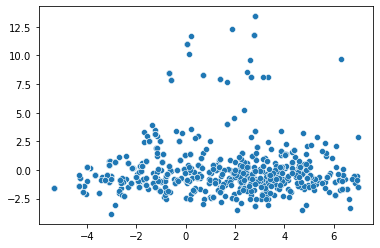

In [7]:
%matplotlib inline

sns.scatterplot(x=pca[:,0], y=pca[:,1])